In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score

In [27]:
data = pd.read_csv("CarPrice_Assignment.csv")
pd.set_option('display.max_columns', None)
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data = data.drop("car_ID",axis=1)

In [6]:
data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
data['CarName'] = data['CarName'].str.split(' ',expand=True)[0]

data["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
data['CarName'] = data['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
data['symboling'] = data['symboling'].astype(object)

In [9]:
data.duplicated().sum().sum()

0

In [10]:
cat_col = data.select_dtypes(include=['object']).columns
num_col = data.select_dtypes(exclude=['object']).columns
data[cat_col]=data[cat_col].astype(str)
df_cat = data[cat_col]
df_num = data[num_col] 

Text(0, 0.5, 'Count of Cars')

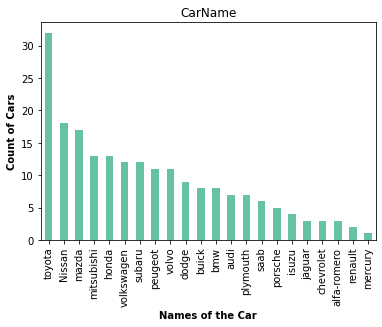

In [11]:
ax=data['CarName'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set2')
ax.title.set_text('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='price', ylabel='Count'>

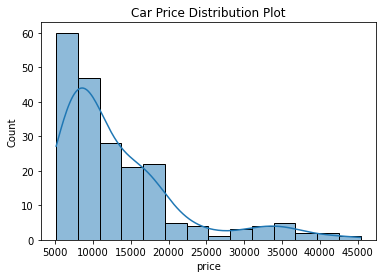

In [12]:
plt.title('Car Price Distribution Plot')
sns.histplot(data["price"], kde=True)

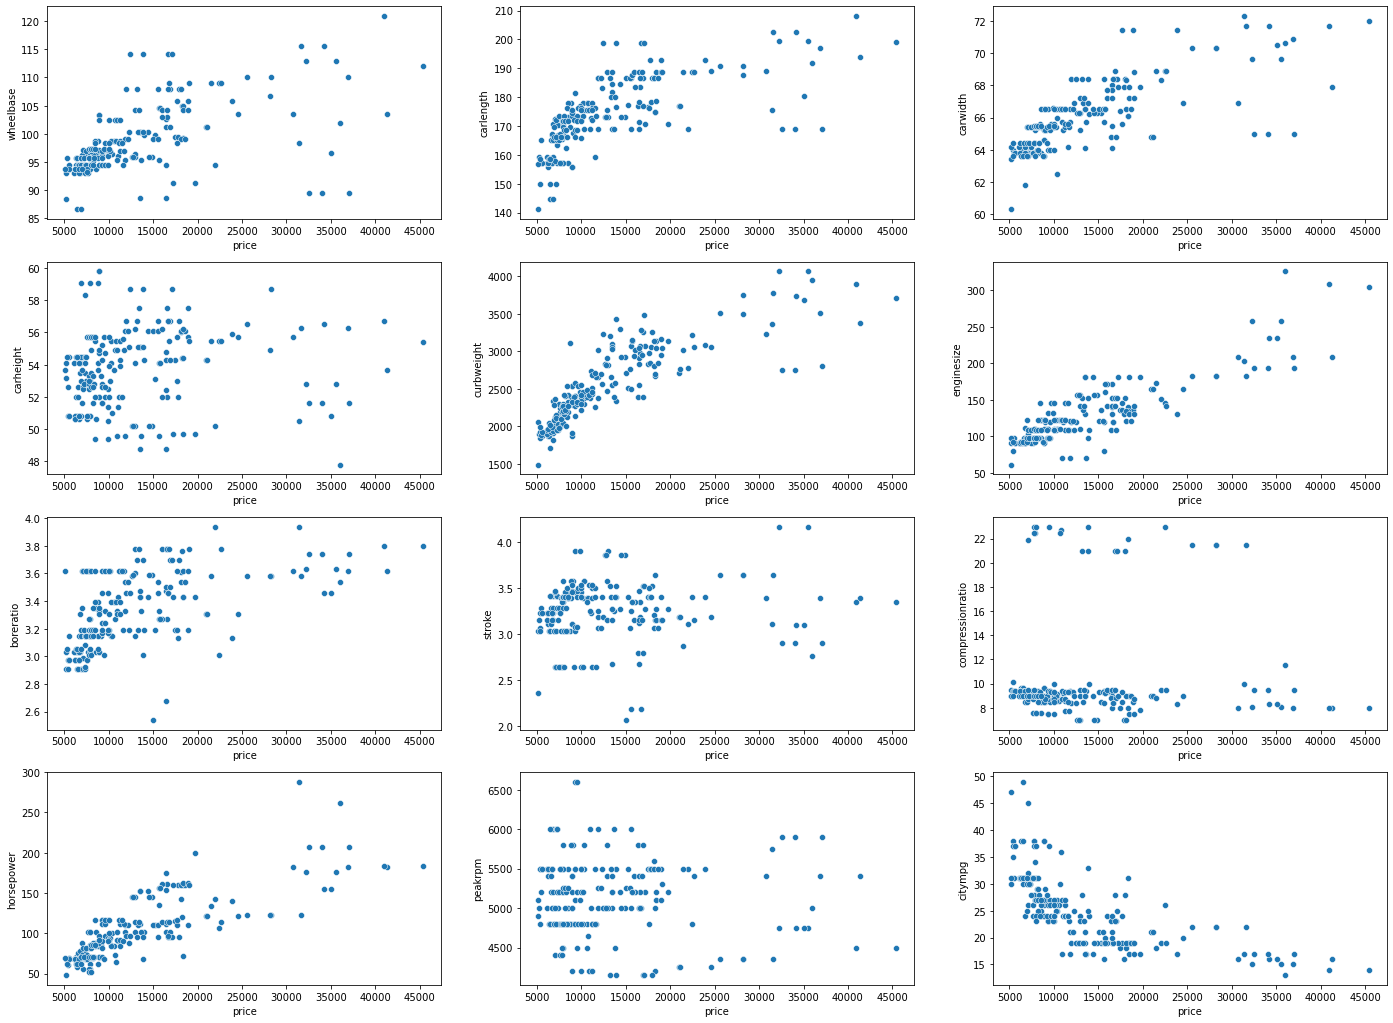

In [13]:
fig, axes = plt.subplots(4,3 , figsize=(24,18))
axes = axes.flatten()
features = df_num.columns[:-2]
for i in range(len(features)):
    sns.scatterplot(data=data, x="price",y=features[i],ax=axes[i])

<AxesSubplot:xlabel='price', ylabel='highwaympg'>

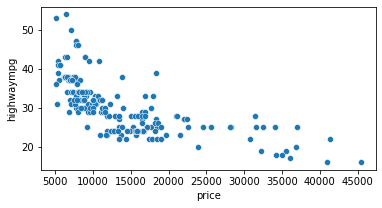

In [14]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=data, x="price",y=df_num.columns[-2])

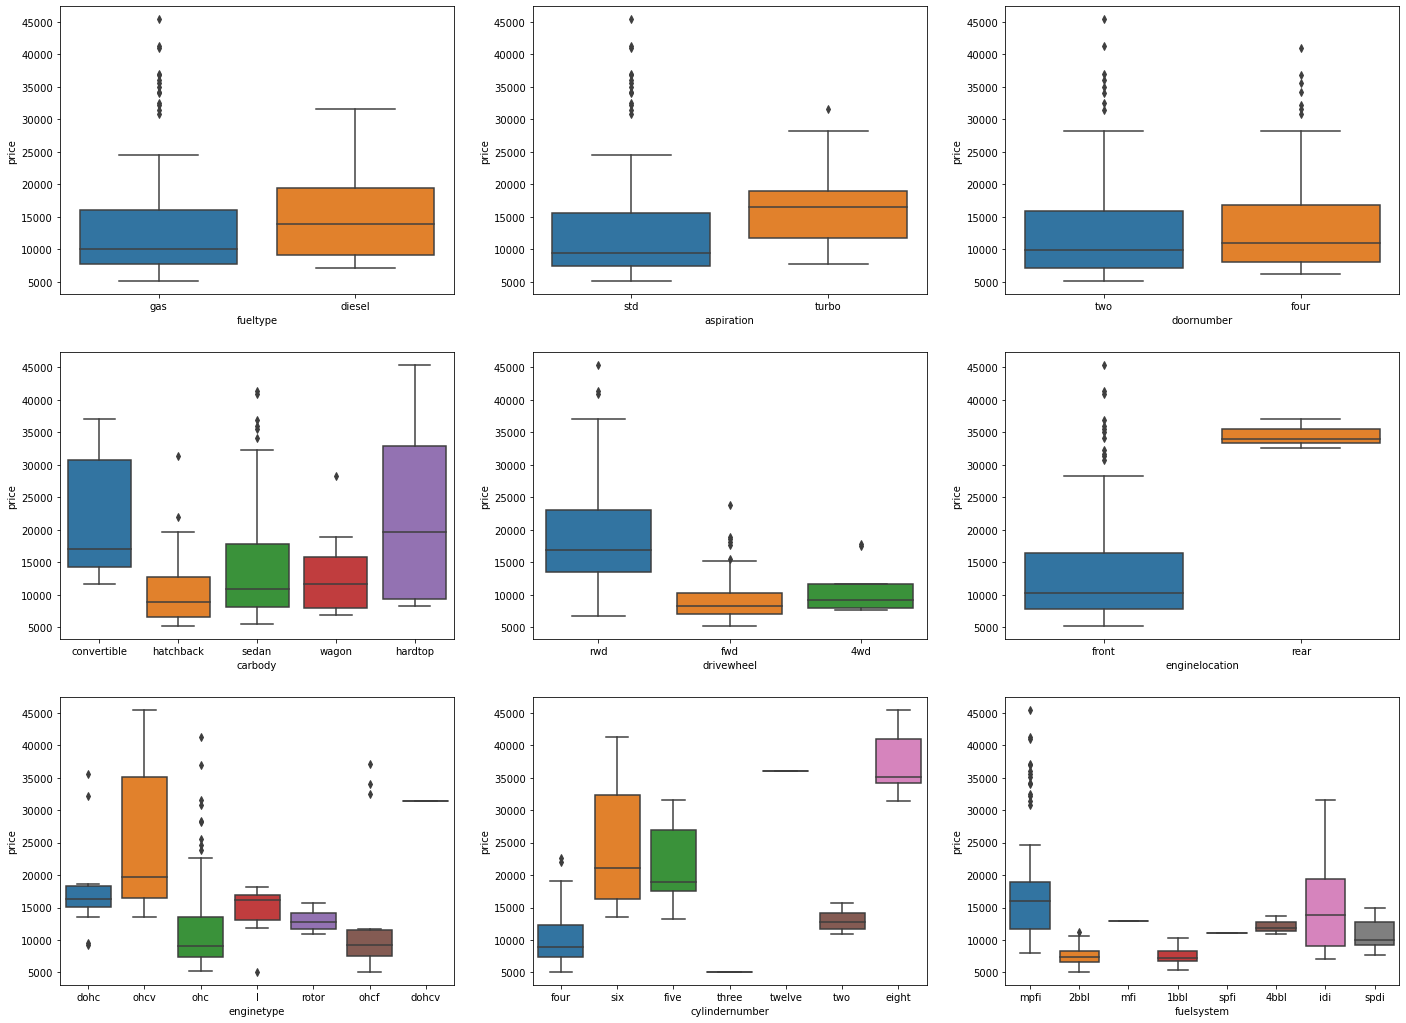

In [15]:
fig, axes = plt.subplots(3,3 , figsize=(24,18))
axes = axes.flatten()
features = list(df_cat.columns)
features.remove("symboling")
features.remove("CarName")
for i in range(len(features)):
    sns.boxplot(x = features[i], y = 'price', data = data,ax=axes[i])
plt.show()

In [16]:
data = data[['price','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel','wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 'citympg','highwaympg', 'carlength','carwidth']]

In [17]:
data.loc[ data['price'] <= 20000, 'priceCatagory'] = 0
data.loc[(data['price'] > 20000) & (data['price'] <= 40000), 'priceCatagory'] = 1
data.loc[ data['price'] > 40000, 'priceCatagory'] = 2
data["priceCatagory"]=data["priceCatagory"].astype(int)

In [18]:
cat=["enginetype","fueltype","aspiration","carbody","cylindernumber","drivewheel"]
for x in cat:
    encoder = LabelEncoder()
    data[x]= encoder.fit_transform(data[x])
data.head()

,price,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,priceCatagory
0,13495.0,0,1,0,0,2,2,88.6,2548,130,3.47,111,21,27,168.8,64.1,0
1,16500.0,0,1,0,0,2,2,88.6,2548,130,3.47,111,21,27,168.8,64.1,0
2,16500.0,5,1,0,2,3,2,94.5,2823,152,2.68,154,19,26,171.2,65.5,0
3,13950.0,3,1,0,3,2,1,99.8,2337,109,3.19,102,24,30,176.6,66.2,0
4,17450.0,3,1,0,3,1,0,99.4,2824,136,3.19,115,18,22,176.6,66.4,0


In [19]:
target = data["price"]
training = data.drop("price",axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(training, target, test_size=0.2, random_state=42)

In [21]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [22]:
model = LinearRegression()
model.fit(X_train,y_train)
preds=model.predict(X_test)
print(r2_score(preds,y_test))

0.9402100010781869


In [23]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
preds=model.predict(X_test)
print(r2_score(preds,y_test))

0.9336707276618244


In [24]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
preds=model.predict(X_test)
print(r2_score(preds,y_test))

0.9627593269044774


In [25]:
model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train,y_train)
preds=model.predict(X_test)
print(r2_score(preds,y_test))

0.8948651325802842


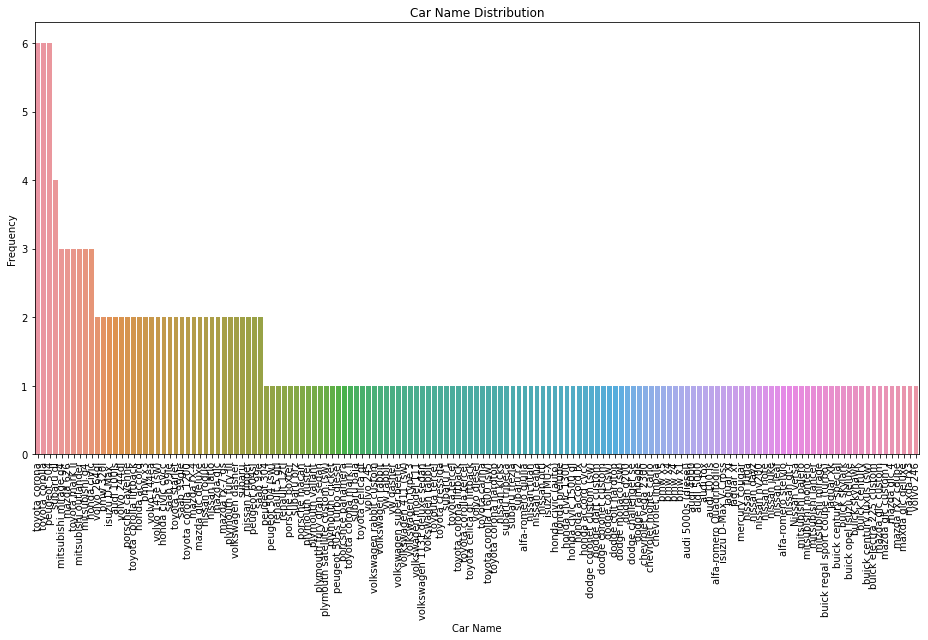

In [29]:
plt.figure(figsize=(13, 9))  # Adjust the figure size as needed
sns.countplot(data=data, x="CarName", order=data["CarName"].value_counts().index)
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust x-axis labels

# Adding labels and title
plt.xlabel("Car Name")
plt.ylabel("Frequency")
plt.title("Car Name Distribution")

# Show the plot
plt.tight_layout()
plt.show()

(array([0, 1]), [Text(0, 0, 'gas'), Text(1, 0, 'diesel')])

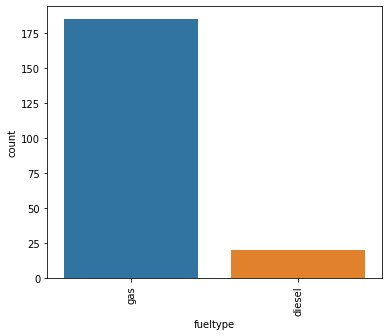

In [30]:
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x="fueltype", order=data["fueltype"].value_counts().index)
plt.xticks(rotation=90, fontsize=10)

(array([0, 1]), [Text(0, 0, 'std'), Text(1, 0, 'turbo')])

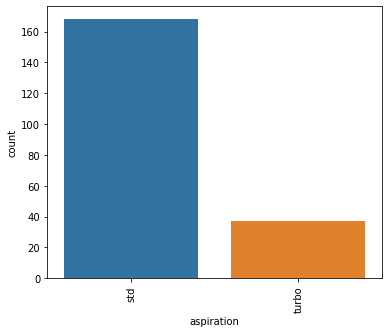

In [31]:
plt.figure(figsize=(6, 5))  
sns.countplot(data=data, x="aspiration", order=data["aspiration"].value_counts().index)
plt.xticks(rotation=90, fontsize=10)

(array([0, 1]), [Text(0, 0, 'four'), Text(1, 0, 'two')])

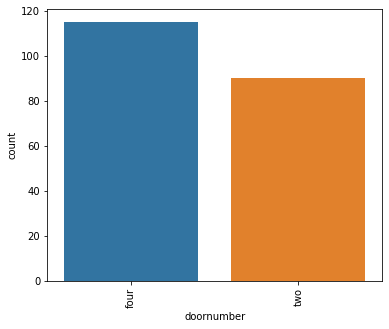

In [32]:
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x="doornumber", order=data["doornumber"].value_counts().index)
plt.xticks(rotation=90, fontsize=10)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'sedan'),
  Text(1, 0, 'hatchback'),
  Text(2, 0, 'wagon'),
  Text(3, 0, 'hardtop'),
  Text(4, 0, 'convertible')])

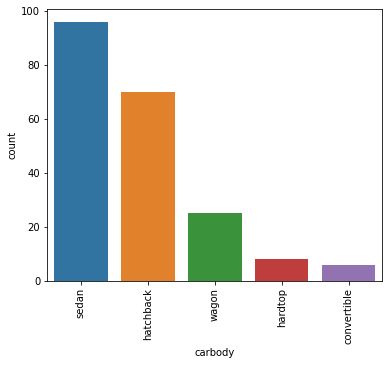

In [33]:
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x="carbody", order=data["carbody"].value_counts().index)
plt.xticks(rotation=90, fontsize=10)

(array([0, 1, 2]), [Text(0, 0, 'fwd'), Text(1, 0, 'rwd'), Text(2, 0, '4wd')])

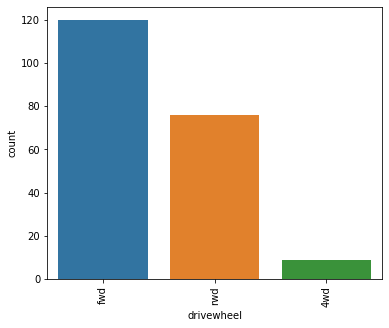

In [34]:
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x="drivewheel", order=data["drivewheel"].value_counts().index)
plt.xticks(rotation=90, fontsize=10)

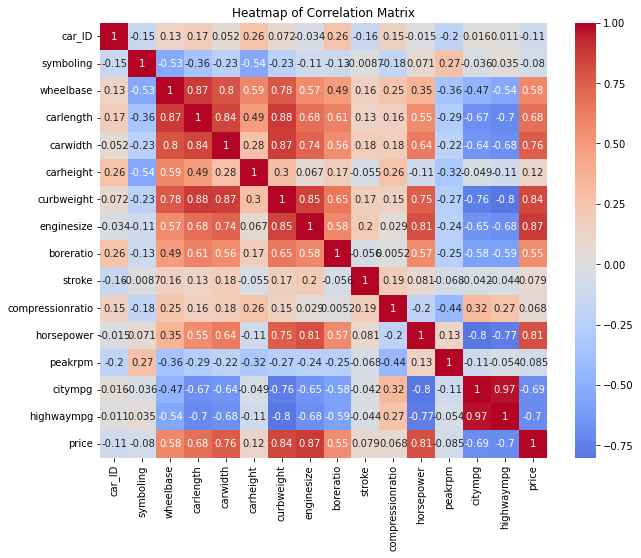

In [36]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation Matrix')
plt.show()